In [98]:
import pandas as pd
import numpy as np
import seaborn as sn
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import bamboolib as bam

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import statsmodels.api as smf
from sklearn.ensemble import RandomForestClassifier


In [10]:
url = 'https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/8de4e3a0-c1d2-47cb-8202-98b9cbe3bd04/download/data2020-full.csv'

In [11]:
df = pd.read_csv(url)

In [5]:
df

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,100271002,1.002710e+08,100271000,356,PRINCETON,ST,1,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
1,100271004,1.002710e+08,100271000,356,PRINCETON,ST,2,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
2,100271006,1.002710e+08,100271000,356,PRINCETON,ST,3,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
3,100272000,NaN,100272000,352,PRINCETON,ST,NaN,2128.0,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100273000,NaN,100273000,,PRINCETON,ST,NaN,2128.0,132,RL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175047,2205550001,2.205550e+09,2205550001,99 219,LAKE SHORE,RD,NaN,2135.0,995,CM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175048,2205589000,2.205589e+09,2205589000,96 94,UNDINE,RD,NaN,2135.0,995,CM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175049,2205629000,2.205629e+09,2205629000,82 80,KENRICK,ST,NaN,2135.0,995,CM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175050,2205642000,2.205642e+09,2205642000,12,KENRICK,ST,NaN,2135.0,995,CM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['PTYPE'].value_counts()

102    65735
101    30524
104    17124
105    13550
995    10072
       ...  
413        1
417        1
949        1
427        1
963        1
Name: PTYPE, Length: 205, dtype: int64

In [13]:
housing = df.loc[(df.PTYPE == 101)]

In [14]:
housing

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
23,100285000,NaN,100285000,349,PRINCETON,ST,NaN,2128.0,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,100287000,NaN,100287000,359,PRINCETON,ST,NaN,2128.0,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,100336000,NaN,100336000,412,BREMEN,ST,NaN,2128.0,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,100337000,NaN,100337000,408,BREMEN,ST,NaN,2128.0,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,100340000,NaN,100340000,398,BREMEN,ST,NaN,2128.0,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170761,2205658000,NaN,2205658000,2,CALTHA,RD,NaN,2135.0,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170763,2205660000,NaN,2205660000,30,LAKE,ST,NaN,2135.0,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170764,2205662010,NaN,2205662010,26,LAKE,ST,NaN,2135.0,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170766,2205663000,NaN,2205663000,22,LAKE,ST,NaN,2135.0,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
per_col = ['CM_ID','OWNER','MAIL CS','GIS_ID','ST_NUM','ST_NAME','ST_NAME_SUF','MAIL_ADDRESSEE','MAIL_ADDRESS','MAIL_ZIPCODE']

In [16]:
housing.drop(per_col, axis=1,inplace=True)

In [17]:
housing.isnull().sum()

PID              0
UNIT_NUM     30523
ZIPCODE          0
PTYPE            0
LU               0
             ...  
U_AC         30524
U_FPLACE     30524
U_INT_FIN    30524
U_INT_CND    30524
U_VIEW       30524
Length: 65, dtype: int64

In [18]:
null_col = ['UNIT_NUM', 'U_AC', 'U_FPLACE', 'U_INT_FIN', 'U_INT_CND', 'U_VIEW']

In [19]:
new = housing.drop(null_col,axis=1)

In [20]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30524 entries, 23 to 170767
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              30524 non-null  int64  
 1   ZIPCODE          30524 non-null  float64
 2   PTYPE            30524 non-null  int64  
 3   LU               30524 non-null  object 
 4   OWN_OCC          30524 non-null  object 
 5   AV_LAND          30524 non-null  int64  
 6   AV_BLDG          30524 non-null  int64  
 7   AV_TOTAL         30524 non-null  int64  
 8   GROSS_TAX        30524 non-null  float64
 9   LAND_SF          30524 non-null  int64  
 10  YR_BUILT         30521 non-null  float64
 11  YR_REMOD         11842 non-null  float64
 12  GROSS_AREA       30524 non-null  float64
 13  LIVING_AREA      30524 non-null  float64
 14  NUM_FLOORS       30523 non-null  float64
 15  STRUCTURE_CLASS  0 non-null      float64
 16  R_BLDG_STYL      30505 non-null  object 
 17  R_ROOF_TYP

In [21]:
new.drop(new.iloc[:, 38:], inplace = True, axis = 1)

In [22]:
new.drop(['STRUCTURE_CLASS'], inplace=True, axis=1)

In [23]:
new.isnull().sum()

PID                   0
ZIPCODE               0
PTYPE                 0
LU                    0
OWN_OCC               0
AV_LAND               0
AV_BLDG               0
AV_TOTAL              0
GROSS_TAX             0
LAND_SF               0
YR_BUILT              3
YR_REMOD          18682
GROSS_AREA            0
LIVING_AREA           0
NUM_FLOORS            1
R_BLDG_STYL          19
R_ROOF_TYP           19
R_EXT_FIN            19
R_TOTAL_RMS          21
R_BDRMS              21
R_FULL_BTH           19
R_HALF_BTH           20
R_BTH_STYLE          19
R_BTH_STYLE2       7722
R_BTH_STYLE3      23779
R_KITCH              21
R_KITCH_STYLE        19
R_KITCH_STYLE2    30501
R_KITCH_STYLE3    30501
R_HEAT_TYP           19
R_AC                 19
R_FPLACE             19
R_EXT_CND            19
R_OVRALL_CND         19
R_INT_CND            19
R_INT_FIN            19
R_VIEW               19
dtype: int64

In [24]:
new.YR_REMOD= new.YR_REMOD.fillna(0)

In [25]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30524 entries, 23 to 170767
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PID             30524 non-null  int64  
 1   ZIPCODE         30524 non-null  float64
 2   PTYPE           30524 non-null  int64  
 3   LU              30524 non-null  object 
 4   OWN_OCC         30524 non-null  object 
 5   AV_LAND         30524 non-null  int64  
 6   AV_BLDG         30524 non-null  int64  
 7   AV_TOTAL        30524 non-null  int64  
 8   GROSS_TAX       30524 non-null  float64
 9   LAND_SF         30524 non-null  int64  
 10  YR_BUILT        30521 non-null  float64
 11  YR_REMOD        30524 non-null  float64
 12  GROSS_AREA      30524 non-null  float64
 13  LIVING_AREA     30524 non-null  float64
 14  NUM_FLOORS      30523 non-null  float64
 15  R_BLDG_STYL     30505 non-null  object 
 16  R_ROOF_TYP      30505 non-null  object 
 17  R_EXT_FIN       30505 non-nul

In [26]:
new.isnull().sum()

PID                   0
ZIPCODE               0
PTYPE                 0
LU                    0
OWN_OCC               0
AV_LAND               0
AV_BLDG               0
AV_TOTAL              0
GROSS_TAX             0
LAND_SF               0
YR_BUILT              3
YR_REMOD              0
GROSS_AREA            0
LIVING_AREA           0
NUM_FLOORS            1
R_BLDG_STYL          19
R_ROOF_TYP           19
R_EXT_FIN            19
R_TOTAL_RMS          21
R_BDRMS              21
R_FULL_BTH           19
R_HALF_BTH           20
R_BTH_STYLE          19
R_BTH_STYLE2       7722
R_BTH_STYLE3      23779
R_KITCH              21
R_KITCH_STYLE        19
R_KITCH_STYLE2    30501
R_KITCH_STYLE3    30501
R_HEAT_TYP           19
R_AC                 19
R_FPLACE             19
R_EXT_CND            19
R_OVRALL_CND         19
R_INT_CND            19
R_INT_FIN            19
R_VIEW               19
dtype: int64

In [27]:
new=new.dropna(axis=1,thresh=len(new)*0.9)

In [28]:
new.isnull().sum()

PID               0
ZIPCODE           0
PTYPE             0
LU                0
OWN_OCC           0
AV_LAND           0
AV_BLDG           0
AV_TOTAL          0
GROSS_TAX         0
LAND_SF           0
YR_BUILT          3
YR_REMOD          0
GROSS_AREA        0
LIVING_AREA       0
NUM_FLOORS        1
R_BLDG_STYL      19
R_ROOF_TYP       19
R_EXT_FIN        19
R_TOTAL_RMS      21
R_BDRMS          21
R_FULL_BTH       19
R_HALF_BTH       20
R_BTH_STYLE      19
R_KITCH          21
R_KITCH_STYLE    19
R_HEAT_TYP       19
R_AC             19
R_FPLACE         19
R_EXT_CND        19
R_OVRALL_CND     19
R_INT_CND        19
R_INT_FIN        19
R_VIEW           19
dtype: int64

In [29]:
new=new.dropna()

In [30]:

new.isna().sum()

PID              0
ZIPCODE          0
PTYPE            0
LU               0
OWN_OCC          0
AV_LAND          0
AV_BLDG          0
AV_TOTAL         0
GROSS_TAX        0
LAND_SF          0
YR_BUILT         0
YR_REMOD         0
GROSS_AREA       0
LIVING_AREA      0
NUM_FLOORS       0
R_BLDG_STYL      0
R_ROOF_TYP       0
R_EXT_FIN        0
R_TOTAL_RMS      0
R_BDRMS          0
R_FULL_BTH       0
R_HALF_BTH       0
R_BTH_STYLE      0
R_KITCH          0
R_KITCH_STYLE    0
R_HEAT_TYP       0
R_AC             0
R_FPLACE         0
R_EXT_CND        0
R_OVRALL_CND     0
R_INT_CND        0
R_INT_FIN        0
R_VIEW           0
dtype: int64

In [31]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30498 entries, 23 to 170767
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            30498 non-null  int64  
 1   ZIPCODE        30498 non-null  float64
 2   PTYPE          30498 non-null  int64  
 3   LU             30498 non-null  object 
 4   OWN_OCC        30498 non-null  object 
 5   AV_LAND        30498 non-null  int64  
 6   AV_BLDG        30498 non-null  int64  
 7   AV_TOTAL       30498 non-null  int64  
 8   GROSS_TAX      30498 non-null  float64
 9   LAND_SF        30498 non-null  int64  
 10  YR_BUILT       30498 non-null  float64
 11  YR_REMOD       30498 non-null  float64
 12  GROSS_AREA     30498 non-null  float64
 13  LIVING_AREA    30498 non-null  float64
 14  NUM_FLOORS     30498 non-null  float64
 15  R_BLDG_STYL    30498 non-null  object 
 16  R_ROOF_TYP     30498 non-null  object 
 17  R_EXT_FIN      30498 non-null  object 
 18  R_TO

In [32]:
new.drop("PTYPE", inplace=True, axis=1)

In [33]:
new.drop("LU", inplace=True, axis=1)

In [34]:
new['ZIPCODE'] = new['ZIPCODE'].astype(int)

In [35]:
new['YR_BUILT'] = new['YR_BUILT'].astype(int)

In [36]:
new['YR_REMOD'] = new['YR_REMOD'].astype(int)

In [37]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30498 entries, 23 to 170767
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            30498 non-null  int64  
 1   ZIPCODE        30498 non-null  int32  
 2   OWN_OCC        30498 non-null  object 
 3   AV_LAND        30498 non-null  int64  
 4   AV_BLDG        30498 non-null  int64  
 5   AV_TOTAL       30498 non-null  int64  
 6   GROSS_TAX      30498 non-null  float64
 7   LAND_SF        30498 non-null  int64  
 8   YR_BUILT       30498 non-null  int32  
 9   YR_REMOD       30498 non-null  int32  
 10  GROSS_AREA     30498 non-null  float64
 11  LIVING_AREA    30498 non-null  float64
 12  NUM_FLOORS     30498 non-null  float64
 13  R_BLDG_STYL    30498 non-null  object 
 14  R_ROOF_TYP     30498 non-null  object 
 15  R_EXT_FIN      30498 non-null  object 
 16  R_TOTAL_RMS    30498 non-null  float64
 17  R_BDRMS        30498 non-null  float64
 18  R_FU

In [38]:
new['OWN_OCC_Reg'] = new['OWN_OCC'].apply(lambda x: 1 if x=="Y" else 0) 

In [39]:
housing_model = new.select_dtypes(exclude=['object'])

In [40]:
housing_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30498 entries, 23 to 170767
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PID          30498 non-null  int64  
 1   ZIPCODE      30498 non-null  int32  
 2   AV_LAND      30498 non-null  int64  
 3   AV_BLDG      30498 non-null  int64  
 4   AV_TOTAL     30498 non-null  int64  
 5   GROSS_TAX    30498 non-null  float64
 6   LAND_SF      30498 non-null  int64  
 7   YR_BUILT     30498 non-null  int32  
 8   YR_REMOD     30498 non-null  int32  
 9   GROSS_AREA   30498 non-null  float64
 10  LIVING_AREA  30498 non-null  float64
 11  NUM_FLOORS   30498 non-null  float64
 12  R_TOTAL_RMS  30498 non-null  float64
 13  R_BDRMS      30498 non-null  float64
 14  R_FULL_BTH   30498 non-null  float64
 15  R_HALF_BTH   30498 non-null  float64
 16  R_FPLACE     30498 non-null  float64
 17  OWN_OCC_Reg  30498 non-null  int64  
dtypes: float64(9), int32(3), int64(6)
memory usa

In [41]:
y=housing_model[['AV_TOTAL']]
x=housing_model.drop(['AV_TOTAL'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
X2 = sm.add_constant(x_train) #this ensures that it adds a constant line to your model
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               AV_TOTAL   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.201e+25
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        13:57:34   Log-Likelihood:             2.6253e+05
No. Observations:               24398   AIC:                        -5.250e+05
Df Residuals:                   24380   BIC:                        -5.249e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.461e-08   3.78e-06     -0.004      

In [43]:
new_model = housing_model.drop(columns=['PID','AV_LAND','AV_BLDG','GROSS_TAX'],axis=1)

In [44]:
tempdf = new_model.pop('AV_TOTAL')
new_model['AV_TOTAL'] = tempdf

In [45]:
new_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30498 entries, 23 to 170767
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ZIPCODE      30498 non-null  int32  
 1   LAND_SF      30498 non-null  int64  
 2   YR_BUILT     30498 non-null  int32  
 3   YR_REMOD     30498 non-null  int32  
 4   GROSS_AREA   30498 non-null  float64
 5   LIVING_AREA  30498 non-null  float64
 6   NUM_FLOORS   30498 non-null  float64
 7   R_TOTAL_RMS  30498 non-null  float64
 8   R_BDRMS      30498 non-null  float64
 9   R_FULL_BTH   30498 non-null  float64
 10  R_HALF_BTH   30498 non-null  float64
 11  R_FPLACE     30498 non-null  float64
 12  OWN_OCC_Reg  30498 non-null  int64  
 13  AV_TOTAL     30498 non-null  int64  
dtypes: float64(8), int32(3), int64(3)
memory usage: 3.1 MB


In [46]:
y=new_model[['AV_TOTAL']]
x=new_model.drop(['AV_TOTAL'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [47]:
X2 = sm.add_constant(x_train) #this ensures that it adds a constant line to your model
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               AV_TOTAL   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     3549.
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        13:57:35   Log-Likelihood:            -3.5049e+05
No. Observations:               24398   AIC:                         7.010e+05
Df Residuals:                   24384   BIC:                         7.011e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.982e+06   3.13e+05     15.925      

Model Optimization

In [48]:
dummies = pd.get_dummies(new_model['ZIPCODE'], dtype=float)
# Drop column as it is now encoded
optimize_model = new_model.drop('ZIPCODE',axis = 1)
optimize_model = optimize_model.join(dummies)

In [49]:
optimize_model.columns = [str(column) for column in optimize_model.columns]
optimize_model

,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,R_FULL_BTH,R_HALF_BTH,...,2130,2131,2132,2134,2135,2136,2186,2215,2445,2467
23,2500,1925,0,1996.0,1160.0,1.5,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,1819,1925,0,1888.0,925.0,1.5,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,1295,1910,0,1911.0,1035.0,1.5,5.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,1250,1915,0,1581.0,928.0,1.5,5.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,2100,1925,0,1970.0,875.0,1.5,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170761,4001,1920,2003,2522.0,1562.0,2.0,6.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
170763,6441,1920,1991,2906.0,1612.0,2.0,8.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
170764,4305,1910,2017,4482.0,2302.0,2.0,7.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
170766,3553,1920,0,4188.0,2347.0,2.0,9.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
y=optimize_model[['AV_TOTAL']]
x=optimize_model.drop(['AV_TOTAL'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [51]:
X2 = sm.add_constant(x_train) #this ensures that it adds a constant line to your model
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               AV_TOTAL   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     2591.
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        13:57:46   Log-Likelihood:            -3.4444e+05
No. Observations:               24398   AIC:                         6.890e+05
Df Residuals:                   24357   BIC:                         6.893e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.059e+05   1.39e+05      2.912      

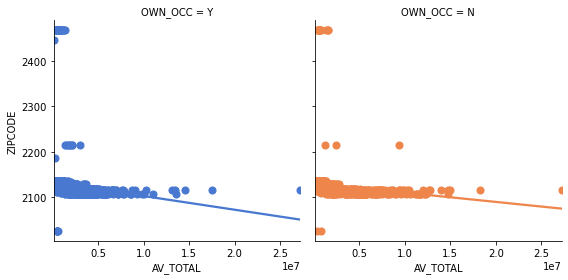

In [52]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="AV_TOTAL", y="ZIPCODE", col="OWN_OCC", hue="OWN_OCC", data=new,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [53]:
new.ZIPCODE.value_counts()

2132    6499
2136    4711
2131    3356
2124    2866
2130    1921
2126    1673
2127    1383
2135    1211
2129    1061
2122    1040
2128     965
2125     916
2119     798
2121     387
2134     365
2116     294
2108     221
2118     220
2114     202
2120     166
2467     123
2115      62
2113      28
2215      11
2026       7
2109       5
2111       5
2186       1
2445       1
Name: ZIPCODE, dtype: int64

In [54]:
new.loc[(new.AV_TOTAL > 15000000)]

,PID,ZIPCODE,OWN_OCC,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,...,R_KITCH_STYLE,R_HEAT_TYP,R_AC,R_FPLACE,R_EXT_CND,R_OVRALL_CND,R_INT_CND,R_INT_FIN,R_VIEW,OWN_OCC_Reg
46314,502826000,2116,Y,6512000,20613400,27125400,286444.22,9960,1904,2008,...,L - Luxury,F - Forced Hot Air,C - Central AC,2.0,E - Excellent,E - Excellent,E - Excellent,E - Elaborate,E - Excellent,1
46331,502831000,2116,N,4334000,13898300,18232300,192533.09,6225,1899,2013,...,L - Luxury,W - Ht Water/Steam,C - Central AC,6.0,E - Excellent,E - Excellent,E - Excellent,E - Elaborate,E - Excellent,0
46580,502896000,2116,Y,4535100,12969500,17504600,184848.57,5936,1860,2013,...,L - Luxury,F - Forced Hot Air,C - Central AC,11.0,G - Good,E - Excellent,E - Excellent,E - Elaborate,A - Average,1
47572,503270010,2116,N,6357500,20869200,27226700,287513.95,7097,1900,2009,...,L - Luxury,F - Forced Hot Air,C - Central AC,8.0,E - Excellent,E - Excellent,E - Excellent,E - Elaborate,E - Excellent,0


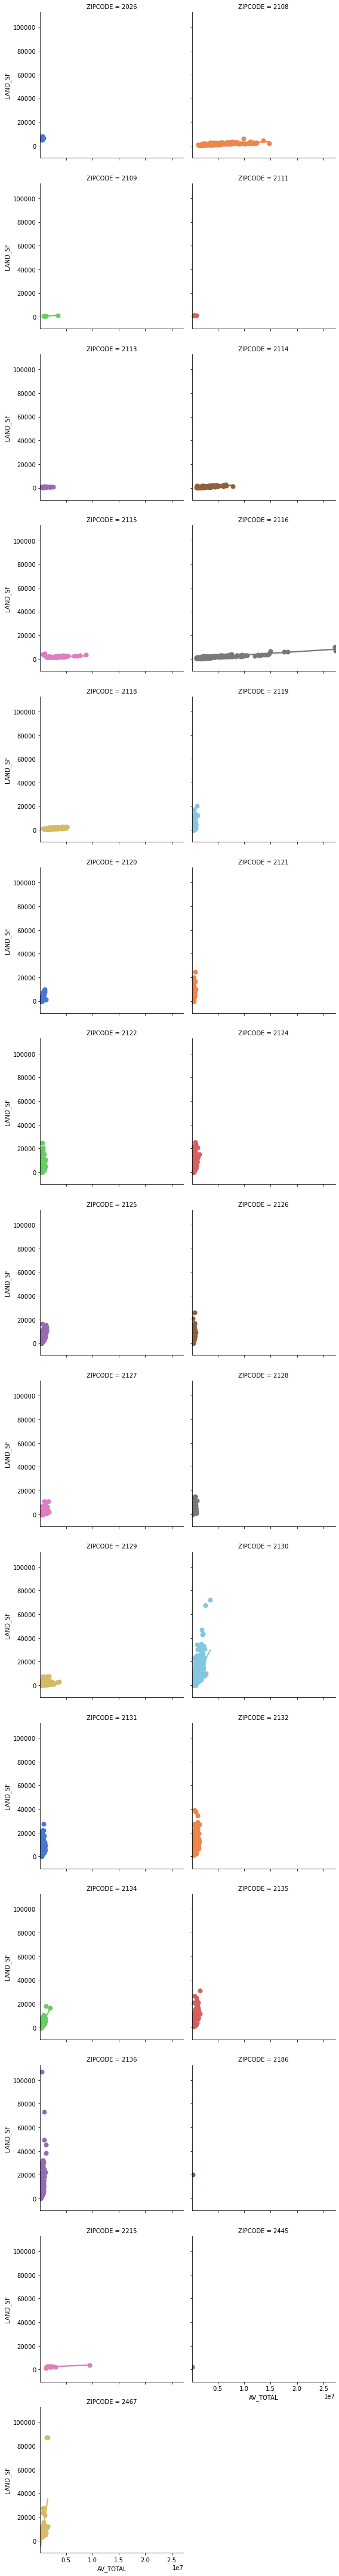

In [55]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="AV_TOTAL", y="LAND_SF", col="ZIPCODE", hue="ZIPCODE", data=new,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [56]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30498 entries, 23 to 170767
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            30498 non-null  int64  
 1   ZIPCODE        30498 non-null  int32  
 2   OWN_OCC        30498 non-null  object 
 3   AV_LAND        30498 non-null  int64  
 4   AV_BLDG        30498 non-null  int64  
 5   AV_TOTAL       30498 non-null  int64  
 6   GROSS_TAX      30498 non-null  float64
 7   LAND_SF        30498 non-null  int64  
 8   YR_BUILT       30498 non-null  int32  
 9   YR_REMOD       30498 non-null  int32  
 10  GROSS_AREA     30498 non-null  float64
 11  LIVING_AREA    30498 non-null  float64
 12  NUM_FLOORS     30498 non-null  float64
 13  R_BLDG_STYL    30498 non-null  object 
 14  R_ROOF_TYP     30498 non-null  object 
 15  R_EXT_FIN      30498 non-null  object 
 16  R_TOTAL_RMS    30498 non-null  float64
 17  R_BDRMS        30498 non-null  float64
 18  R_FU

In [57]:
dummies = pd.get_dummies(new['R_HEAT_TYP'], dtype=float)
# Drop column as it is now encoded
#optimize_model = new_model.drop('ZIPCODE',axis = 1)
optimize_model = optimize_model.join(dummies)

In [58]:
optimize_model

,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,R_FULL_BTH,R_HALF_BTH,...,2215,2445,2467,E - Electric,F - Forced Hot Air,N - None,O - Other,P - Heat Pump,S - Space Heat,W - Ht Water/Steam
23,2500,1925,0,1996.0,1160.0,1.5,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25,1819,1925,0,1888.0,925.0,1.5,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129,1295,1910,0,1911.0,1035.0,1.5,5.0,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
130,1250,1915,0,1581.0,928.0,1.5,5.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
133,2100,1925,0,1970.0,875.0,1.5,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170761,4001,1920,2003,2522.0,1562.0,2.0,6.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170763,6441,1920,1991,2906.0,1612.0,2.0,8.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170764,4305,1910,2017,4482.0,2302.0,2.0,7.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170766,3553,1920,0,4188.0,2347.0,2.0,9.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
new.R_OVRALL_CND.value_counts()

A - Average      23181
G - Good          6627
F - Fair           331
E - Excellent      326
P - Poor            33
Name: R_OVRALL_CND, dtype: int64

In [60]:
dummies = pd.get_dummies(new['R_OVRALL_CND'],dtype=float)
optimize_model = optimize_model.join(dummies, how='left')

In [61]:
optimize_model.columns = [str(column) for column in optimize_model.columns]
optimize_model

,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,R_FULL_BTH,R_HALF_BTH,...,N - None,O - Other,P - Heat Pump,S - Space Heat,W - Ht Water/Steam,A - Average,E - Excellent,F - Fair,G - Good,P - Poor
23,2500,1925,0,1996.0,1160.0,1.5,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
25,1819,1925,0,1888.0,925.0,1.5,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
129,1295,1910,0,1911.0,1035.0,1.5,5.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130,1250,1915,0,1581.0,928.0,1.5,5.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
133,2100,1925,0,1970.0,875.0,1.5,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170761,4001,1920,2003,2522.0,1562.0,2.0,6.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
170763,6441,1920,1991,2906.0,1612.0,2.0,8.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
170764,4305,1910,2017,4482.0,2302.0,2.0,7.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
170766,3553,1920,0,4188.0,2347.0,2.0,9.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [62]:
y=optimize_model[['AV_TOTAL']]
x=optimize_model.drop(['AV_TOTAL'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [63]:
X2 = sm.add_constant(x_train) #this ensures that it adds a constant line to your model
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               AV_TOTAL   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     2382.
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        13:57:54   Log-Likelihood:            -3.4314e+05
No. Observations:               24398   AIC:                         6.864e+05
Df Residuals:                   24347   BIC:                         6.868e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.445e+05   1.06

In [64]:
sns.displot(new, x="AV_TOTAL", kind="kde")

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
sns.displot(new, x="AV_TOTAL", bins=40)

In [ ]:
new.AV_TOTAL.describe()

# Distribution **Correction**

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(y)
y_scaled = scaler.transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y_scaled,test_size=0.2)

In [ ]:
X2 = sm.add_constant(x_train) #this ensures that it adds a constant line to your model
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
y_minmax = min_max_scaler.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y_minmax,test_size=0.2)

In [ ]:
X2 = sm.add_constant(x_train) #this ensures that it adds a constant line to your model
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

In [65]:
y_mean = y.mean()

In [66]:
y_std = y.std()

In [67]:
y_normalized = (y - y_mean) / y_std

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y_normalized,test_size=0.2)

In [69]:
X2 = sm.add_constant(x_train) #this ensures that it adds a constant line to your model
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               AV_TOTAL   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     2353.
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        13:57:55   Log-Likelihood:                -13454.
No. Observations:               24398   AIC:                         2.701e+04
Df Residuals:                   24347   BIC:                         2.742e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1882      0

In [70]:
new['ZIPCODE'] = new['ZIPCODE'].astype(str)

In [71]:
#new['YR_BUILT'] = new['YR_BUILT'].astype(str)

In [72]:
#new['PTYPE'] = new["PTYPE"].astype(str)

In [73]:
#new['PID'] = new["PID"].astype(str)

(array([2228.,   38.,  576., 1615., 3782., 2885., 3100., 8068., 6629.,
        1577.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <BarContainer object of 10 artists>)

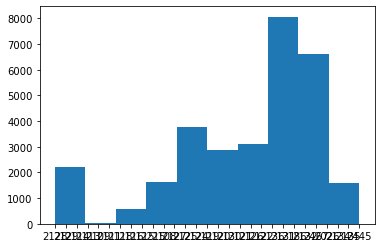

In [74]:
plt.hist(new.ZIPCODE)

In [75]:
data = new.ZIPCODE

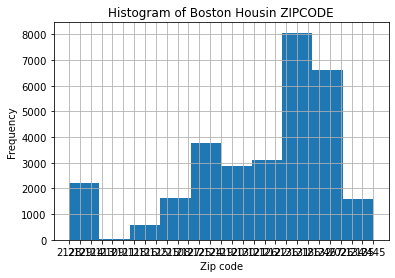

In [76]:
new.ZIPCODE.hist()
plt.title("Histogram of Boston Housin ZIPCODE")
plt.xlabel("Zip code")
plt.ylabel("Frequency")



plt.show()



<Figure size 7200x7200 with 0 Axes>

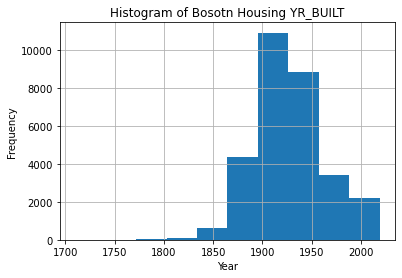

<Figure size 7200x7200 with 0 Axes>

In [77]:
new.YR_BUILT.hist()
plt.title("Histogram of Bosotn Housing YR_BUILT")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.figure(figsize=(100, 100))

<AxesSubplot:xlabel='AV_TOTAL', ylabel='ZIPCODE'>

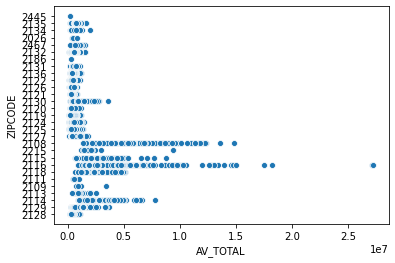

In [78]:
sns.scatterplot(data=new, x="AV_TOTAL", y="ZIPCODE")

<AxesSubplot:xlabel='AV_TOTAL', ylabel='AV_LAND'>

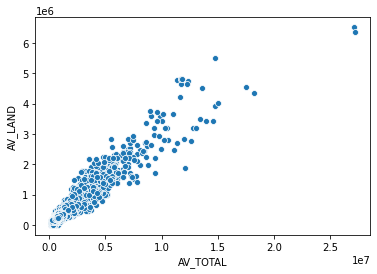

In [79]:
sns.scatterplot(data=new, x="AV_TOTAL", y="AV_LAND")

<AxesSubplot:xlabel='AV_TOTAL', ylabel='ZIPCODE'>

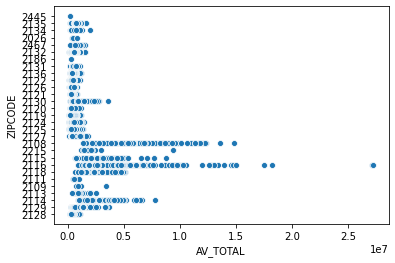

In [80]:
sns.scatterplot(data=new, x="AV_TOTAL", y="ZIPCODE")

<AxesSubplot:xlabel='AV_TOTAL', ylabel='AV_BLDG'>

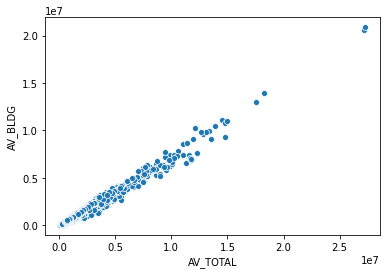

In [81]:
sns.scatterplot(data=new, x="AV_TOTAL", y="AV_BLDG")

<AxesSubplot:xlabel='GROSS_TAX', ylabel='AV_TOTAL'>

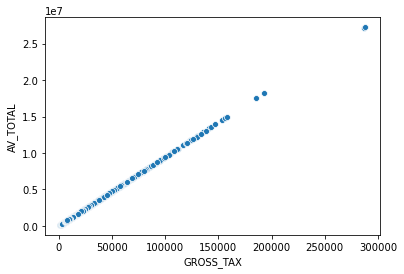

In [82]:
sns.scatterplot(data=new, x="GROSS_TAX", y="AV_TOTAL")

<AxesSubplot:title={'center':'AV_TOTAL'}, xlabel='ZIPCODE'>

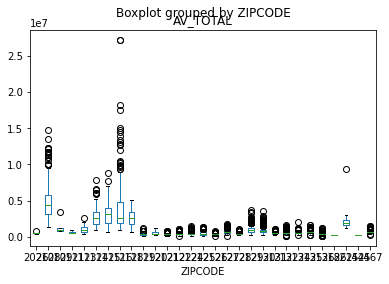

In [83]:
new.boxplot(by ='ZIPCODE', column =['AV_TOTAL'], grid = False)

In [84]:
new.loc[(new.AV_TOTAL == 0)]

,PID,ZIPCODE,OWN_OCC,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,...,R_KITCH_STYLE,R_HEAT_TYP,R_AC,R_FPLACE,R_EXT_CND,R_OVRALL_CND,R_INT_CND,R_INT_FIN,R_VIEW,OWN_OCC_Reg


In [85]:
new.describe()

,PID,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,R_FULL_BTH,R_HALF_BTH,R_FPLACE,OWN_OCC_Reg
count,3.049800e+04,3.049800e+04,3.049800e+04,3.049800e+04,30498.000000,30498.000000,30498.000000,30498.000000,30498.000000,30498.000000,30498.000000,30498.000000,30498.000000,30498.000000,30498.000000,30498.000000,30498.000000
mean,1.591479e+09,2.157713e+05,4.203099e+05,6.360812e+05,6717.012870,5041.544528,1927.468490,777.037281,2948.795987,1765.099449,1.880681,7.259853,3.398256,1.468719,0.584661,0.608237,0.834874
std,5.696455e+08,2.366613e+05,5.366308e+05,7.574776e+05,7998.963903,3253.548182,35.340273,976.297145,1077.195113,762.469832,0.575149,1.805633,0.997468,0.720569,0.564840,0.869963,0.371300
min,1.000210e+08,0.000000e+00,2.050000e+04,1.221300e+05,1289.690000,0.000000,1710.000000,0.000000,510.000000,168.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.501037e+09,1.446250e+05,2.419000e+05,3.906000e+05,4124.730000,3300.250000,1900.000000,0.000000,2274.000000,1311.000000,1.500000,6.000000,3.000000,1.000000,0.000000,0.000000,1.000000
50%,1.807306e+09,1.729000e+05,3.181000e+05,4.912500e+05,5187.595000,4848.000000,1925.000000,0.000000,2694.000000,1597.000000,2.000000,7.000000,3.000000,1.000000,1.000000,0.000000,1.000000
75%,2.003135e+09,2.134000e+05,4.252000e+05,6.345000e+05,6700.310000,6244.000000,1950.000000,2002.000000,3377.000000,2016.000000,2.000000,8.000000,4.000000,2.000000,1.000000,1.000000,1.000000
max,2.205663e+09,6.512000e+06,2.086920e+07,2.722670e+07,287513.950000,107158.000000,2019.000000,2019.000000,23335.000000,21711.000000,5.000000,27.000000,12.000000,21.000000,6.000000,12.000000,1.000000


In [86]:
new.loc[(new.LAND_SF == 0.0)]

,PID,ZIPCODE,OWN_OCC,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,...,R_KITCH_STYLE,R_HEAT_TYP,R_AC,R_FPLACE,R_EXT_CND,R_OVRALL_CND,R_INT_CND,R_INT_FIN,R_VIEW,OWN_OCC_Reg
10794,201205010,2129,Y,0,412600,412600,4357.05,0,2001,0,...,M - Modern,F - Forced Hot Air,N - None,1.0,G - Good,G - Good,G - Good,N - Normal,A - Average,1
10795,201206010,2129,Y,0,343700,343700,3629.47,0,2001,0,...,M - Modern,F - Forced Hot Air,N - None,1.0,G - Good,G - Good,G - Good,N - Normal,A - Average,1
10798,201209010,2129,Y,0,392900,392900,4149.02,0,2001,0,...,M - Modern,F - Forced Hot Air,C - Central AC,1.0,G - Good,G - Good,G - Good,N - Normal,A - Average,1
10799,201210010,2129,Y,0,432200,432200,4564.03,0,2001,0,...,M - Modern,F - Forced Hot Air,C - Central AC,1.0,G - Good,G - Good,G - Good,N - Normal,A - Average,1
10803,201214010,2129,Y,0,412600,412600,4357.05,0,2001,0,...,M - Modern,F - Forced Hot Air,C - Central AC,2.0,G - Good,G - Good,G - Good,N - Normal,G - Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164770,2201738060,2134,Y,0,342200,342200,3613.63,0,2006,0,...,M - Modern,F - Forced Hot Air,N - None,0.0,G - Good,G - Good,G - Good,N - Normal,A - Average,1
164771,2201738070,2134,Y,0,342200,342200,3613.63,0,2006,0,...,M - Modern,F - Forced Hot Air,N - None,0.0,A - Average,G - Good,G - Good,N - Normal,A - Average,1
164772,2201738080,2134,Y,0,342200,342200,3613.63,0,2006,0,...,M - Modern,F - Forced Hot Air,N - None,0.0,G - Good,G - Good,G - Good,N - Normal,A - Average,1
164773,2201738090,2134,Y,0,342200,342200,3613.63,0,2006,0,...,M - Modern,F - Forced Hot Air,N - None,0.0,G - Good,G - Good,G - Good,N - Normal,A - Average,1


In [87]:
housing_corr = new.corr()

In [88]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(housing_corr, dtype=bool))

<AxesSubplot:>

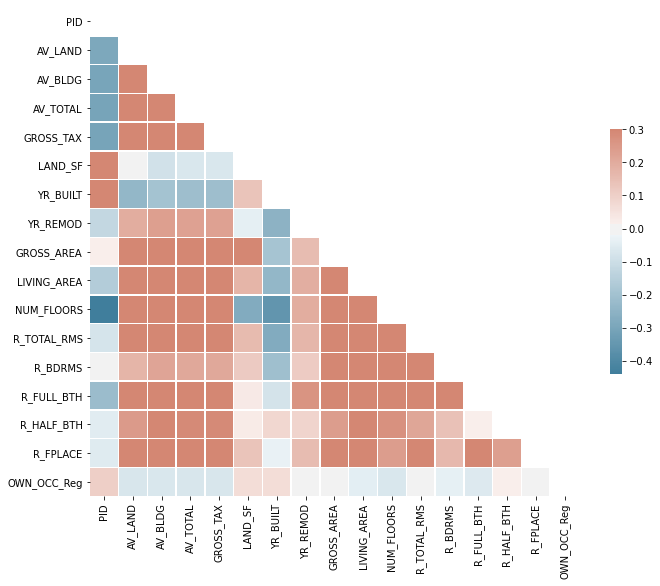

In [89]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(housing_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [90]:
new

,PID,ZIPCODE,OWN_OCC,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,...,R_KITCH_STYLE,R_HEAT_TYP,R_AC,R_FPLACE,R_EXT_CND,R_OVRALL_CND,R_INT_CND,R_INT_FIN,R_VIEW,OWN_OCC_Reg
23,100285000,2128,Y,180700,184400,365100,3855.45,2500,1925,0,...,S - Semi-Modern,W - Ht Water/Steam,N - None,0.0,A - Average,A - Average,A - Average,N - Normal,A - Average,1
25,100287000,2128,Y,151200,157100,308300,3255.64,1819,1925,0,...,N - No Remodeling,W - Ht Water/Steam,N - None,0.0,F - Fair,A - Average,A - Average,N - Normal,A - Average,1
129,100336000,2128,Y,125400,149700,275100,2905.06,1295,1910,0,...,S - Semi-Modern,E - Electric,C - Central AC,0.0,A - Average,A - Average,A - Average,N - Normal,A - Average,1
130,100337000,2128,Y,123700,156700,280400,2961.02,1250,1915,0,...,N - No Remodeling,F - Forced Hot Air,N - None,0.0,A - Average,A - Average,A - Average,N - Normal,A - Average,1
133,100340000,2128,N,146000,162000,308000,3252.48,2100,1925,0,...,S - Semi-Modern,F - Forced Hot Air,C - Central AC,0.0,A - Average,A - Average,A - Average,N - Normal,F - Fair,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170761,2205658000,2135,Y,236100,395500,631600,6669.69,4001,1920,2003,...,M - Modern,W - Ht Water/Steam,N - None,0.0,A - Average,A - Average,A - Average,N - Normal,A - Average,1
170763,2205660000,2135,Y,285200,398300,683500,7217.75,6441,1920,1991,...,S - Semi-Modern,W - Ht Water/Steam,N - None,0.0,A - Average,A - Average,A - Average,N - Normal,A - Average,1
170764,2205662010,2135,Y,251100,635400,886500,9361.43,4305,1910,2017,...,M - Modern,W - Ht Water/Steam,C - Central AC,2.0,A - Average,A - Average,G - Good,N - Normal,A - Average,1
170766,2205663000,2135,Y,233700,485900,719600,7598.97,3553,1920,0,...,S - Semi-Modern,W - Ht Water/Steam,N - None,1.0,A - Average,A - Average,A - Average,N - Normal,A - Average,1


In [91]:
new.ZIPCODE.unique()

array(['2128', '2129', '2114', '2113', '2109', '2111', '2118', '2116',
       '2115', '2215', '2108', '2127', '2125', '2124', '2119', '2120',
       '2130', '2121', '2126', '2122', '2136', '2131', '2186', '2132',
       '2467', '2026', '2134', '2135', '2445'], dtype=object)

In [92]:
dummies = pd.get_dummies(new['ZIPCODE'], dtype=float)
# Drop column as it is now encoded
new = new.drop('ZIPCODE',axis = 1)
new = new.join(dummies)

In [93]:
new

,PID,OWN_OCC,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,...,2130,2131,2132,2134,2135,2136,2186,2215,2445,2467
23,100285000,Y,180700,184400,365100,3855.45,2500,1925,0,1996.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,100287000,Y,151200,157100,308300,3255.64,1819,1925,0,1888.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,100336000,Y,125400,149700,275100,2905.06,1295,1910,0,1911.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,100337000,Y,123700,156700,280400,2961.02,1250,1915,0,1581.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,100340000,N,146000,162000,308000,3252.48,2100,1925,0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170761,2205658000,Y,236100,395500,631600,6669.69,4001,1920,2003,2522.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
170763,2205660000,Y,285200,398300,683500,7217.75,6441,1920,1991,2906.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
170764,2205662010,Y,251100,635400,886500,9361.43,4305,1910,2017,4482.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
170766,2205663000,Y,233700,485900,719600,7598.97,3553,1920,0,4188.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

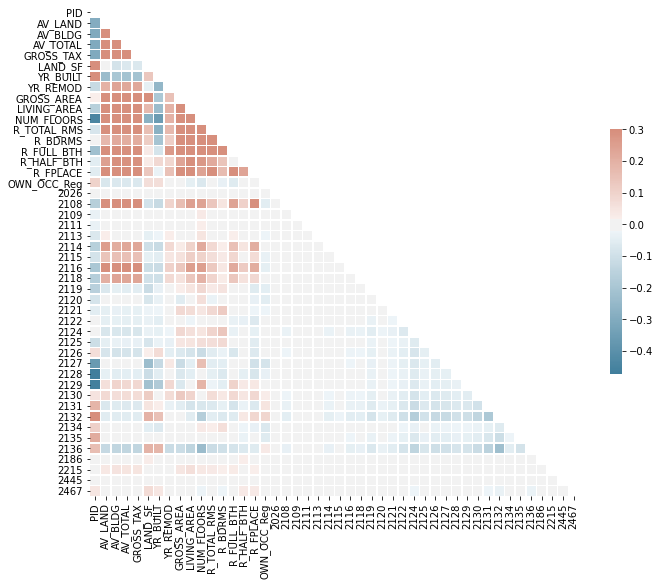

In [94]:
housing_corr = new.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(housing_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(housing_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [99]:
#test out different estimators to see how model improves, test out 10,20,50
rfclass=RandomForestClassifier(n_estimators=500,random_state=0) 
rfclass.fit(x_train,y_train)
rfypred=rfclass.predict(x_test)
#print(accuracy_score(y_test,rfypred))
rfclass.score(x_test, y_test)

ValueError: Unknown label type: 'continuous'